In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Question 3:

part 2:

In [2]:
#define image1 here
image1 = np.array([
    [150, 151, 153, 155, 156, 155, 154],
    [150, 151, 153, 155, 156, 155, 154],
    [150, 151, 153, 155, 156, 155, 154],
    [150, 151, 153, 155, 156, 155, 154],
    [150, 151, 153, 155, 156, 155, 154]
    ], dtype=np.uint8) ## defining the array in the question using numpy

In [3]:
#code here
#first define a function for calculating histogram
def calc_hist(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256]) ## using cv2.calcHist, first parameter is a list of images, second parameter is the channel for which we calculate the histogram, it could be a list of channels, third parameter no idea, forth parameter is histogram size and fifth parameter says that histogram should be calculated for numbers from 0 to 256
    return(hist)

Text(0.5, 1.0, 'histogram')

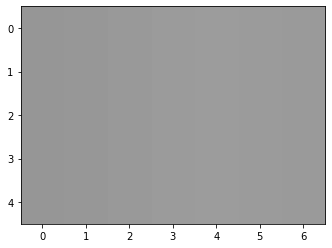

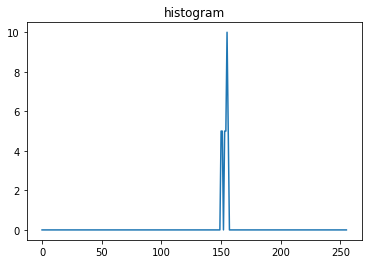

In [4]:
#dont change this cell
plt.imshow(image1,cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(image1))
plt.title('histogram')

In [5]:
#code here
#define a function (stretch) for stretching(input:image , output: stretched image)


def stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with histogram stretching
  '''
  output_image = image.copy()
  image_min = np.min(image) ## gets the min pixel of image in an efficient way
  image_max = np.max(image) ## gets the max pixel of image in an efficient way
  output_image = (output_image - image_min) * (255 // (image_max - image_min))

  # End
  return output_image


Text(0.5, 1.0, 'new histogram')

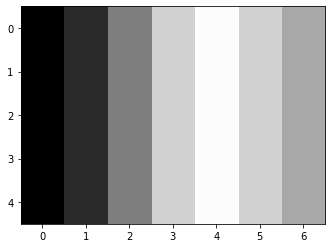

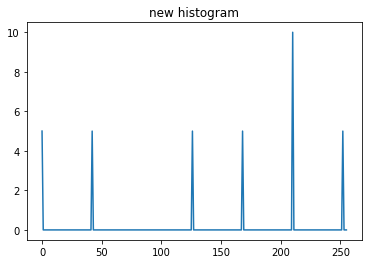

In [6]:
#dont change this cell
plt.imshow(stretch_hist(image1),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(stretch_hist(image1)))
plt.title('new histogram')

# part3


In [10]:
# first read the image and show it.(image2)
image2 = cv2.imread("Q3_image/image2.jpg", 0)

Text(0.5, 1.0, 'new histogram')

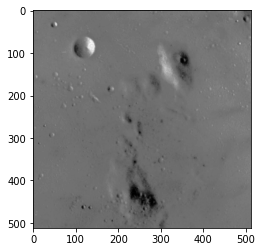

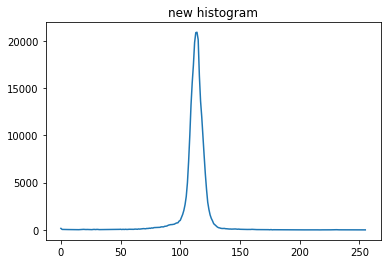

In [9]:
#use stretch function to improve quality of the image and show it
plt.imshow(stretch_hist(image2),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(stretch_hist(image2)))
plt.title('new histogram')


In [11]:
#define new function that can improve this image 

def modified_stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with modified histogram stretching
  '''
  
  percent = 1 
  # a = (image.shape[0]*image.shape[1]*percent) // 100
  raveled = np.ravel(image) ## this function make numpy array to a 1D array
  print(len(raveled))
  image_min = np.percentile(raveled, percent) ## this function first sort the array and then throw n percent of the first of the array away and give the next element
  image_max = np.percentile(raveled, 100 - percent)
  cliped = np.clip(raveled, image_min, image_max) ## this function changes values less than image_min to image_min and values greater than image_max to image_max
  output_image = cliped.reshape((image.shape[0], image.shape[1])) ## this function reshapes back the flattened array
  output_image = stretch_hist(output_image).astype(np.uint8) ## now we can stretch this modified image
  # Start
  # End
  return output_image

262144
262144


Text(0.5, 1.0, 'new histogram')

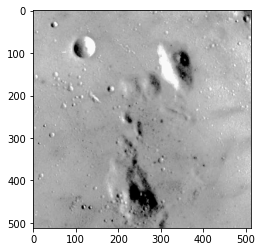

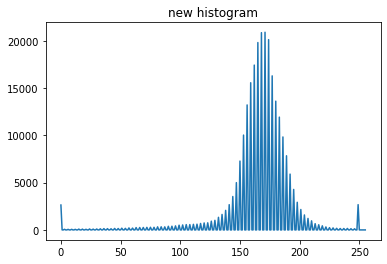

In [12]:
#try your new function and show the result
plt.imshow(modified_stretch_hist(image2),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(modified_stretch_hist(image2)))
plt.title('new histogram')





